<a href="https://colab.research.google.com/github/gnc506/ProgFinalAssess2/blob/main/Volcanos_Assessment_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

General Overview

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

bigdf = pd.read_csv('/content/drive/MyDrive/Data Science MSc/Programming/Assessment 2/output.csv')
bigdf = bigdf.drop(bigdf.columns[0], axis=1)
bigdf = bigdf.drop([0])

vol_data = bigdf[['Year', 'Tsu', 'Eq', 'Name', 'Country', 'Type', 'Latitude', 'Longitude', 'Elevation (m)', 'VEI', 'Total Damage ($Mil)', 'Houses Destroyed', 'Total Deaths', 'Total Injuries']]
#vol_data = vol_data.fillna(0)
vol_data.describe()


,Year,Tsu,Eq,Latitude,Longitude,Elevation (m),VEI,Total Damage ($Mil),Houses Destroyed,Total Deaths,Total Injuries
count,845.000000,170.000000,75.000000,845.000000,845.000000,845.000000,664.000000,26.000000,42.000000,460.000000,102.000000
mean,1837.583432,2369.129412,5615.786667,15.064574,54.994785,1972.457988,2.756024,198.078154,931.571429,725.854348,488.009804
std,281.943961,1809.016087,3428.699124,25.533988,99.632277,1249.310195,1.196069,425.089307,1890.278017,4146.191575,3303.763172
min,46.000000,21.000000,58.000000,-63.001000,-177.920000,-642.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,1817.000000,1020.500000,2087.000000,-6.770000,-19.666000,1117.000000,2.000000,3.673000,24.000000,2.000000,3.000000
50%,1928.000000,1824.500000,6050.000000,13.257000,110.446000,1728.000000,3.000000,19.500000,85.500000,6.000000,11.000000
75%,1987.000000,3147.750000,8781.500000,36.406000,130.862000,2715.000000,3.000000,118.750000,672.750000,60.250000,42.750000
max,2023.000000,5905.000000,10556.000000,65.715000,177.180000,6377.000000,7.000000,2000.000000,9000.000000,60000.000000,31943.000000


In [103]:
import plotly.express as px
fig = px.scatter_geo(vol_data, lat='Latitude', lon='Longitude', color='Type', hover_name='Name', title="Map Showing the Distributions of Volcanic Eruptions and their Type")
fig.show()

In [137]:
import math
import numpy as np
from scipy.stats import shapiro
from scipy.stats import lognorm
shapiro(vol_data['VEI'])

ShapiroResult(statistic=nan, pvalue=1.0)

### Elevation and Destruction



In [104]:
vol_data["Elevation (m)"] = vol_data["Elevation (m)"].astype(float)
fig2 = px.scatter_geo(vol_data, lat='Latitude', lon='Longitude', color='Elevation (m)', title="Map Showing the Distributions of Volcanic Eruptions and their Elevation")
fig2.show()

<ipython-input-104-a278e7dd60d8>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [100]:
figElevationxDeaths = px.scatter(vol_data, x='Elevation (m)', y= 'Total Deaths', trendline='ols', title="Scatter Graph Showing Volcanos Elevation and the combined injuries and deaths")
figElevationxDeaths

In [89]:
figElevationxInjuries = px.scatter(vol_data, x='Elevation (m)', y= 'Total Injuries', trendline='ols', title="Scatter Graph Showing Volcanos Elevation and the combined injuries and deaths")
figElevationxInjuries

In [61]:
figElevationxTsu = px.scatter(vol_data, x='Elevation (m)', y= 'Tsu', trendline='ols', title="Scatter Graph Showing Volcanos Elevation and the tsunami caused")
figElevationxTsu

In [66]:
figElevationxDamage = px.scatter(vol_data, x='Elevation (m)', y= 'Total Damage ($Mil)', trendline='ols', title="Scatter Graph Showing Volcanos Elevation and total damage")
figElevationxDamage

In [65]:
figElevationxHomes = px.scatter(vol_data, x='Elevation (m)', y= 'Houses Destroyed', trendline='ols', title="Scatter Graph Showing Volcanos Elevation and houses destroyed")
figElevationxHomes

## VEI and Destruction

In [70]:
vol_data["VEI"] = vol_data["VEI"].astype(float)
VEIfig = px.scatter_geo(vol_data, lat='Latitude', lon='Longitude', color='VEI', title="Scatter Graph Showing Volcanos VEI and the Year of Eruption")
VEIfig


<ipython-input-70-b81a8ab8f7aa>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [113]:
figVEIxDeaths = px.scatter(vol_data, x='VEI', y='Total Deaths', trendline='ols', title="Scatter Graph Showing Volcanos VEI and the deaths")
figVEIxDeaths

In [120]:
from scipy.stats import spearmanr

#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(vol_data['VEI'], vol_data['Total Deaths'], nan_policy='omit')

#print Spearman rank correlation and p-value
print(rho)
print(p)



0.3948292220964943
4.575867299622441e-15


In [92]:
figVEIxInjur = px.scatter(vol_data, x='VEI', y='Total Injuries', trendline='ols', title="Scatter Graph Showing Volcanos VEI and the injuries")
figVEIxInjur

In [121]:
from scipy.stats import spearmanr

#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(vol_data['VEI'], vol_data['Total Injuries'], nan_policy='omit')

#print Spearman rank correlation and p-value
print(rho)
print(p)

0.45876843800728706
1.652042180403789e-05


In [75]:
figVEIxTsu = px.scatter(vol_data, x='VEI', y='Tsu', trendline='ols', title="Scatter Graph Showing Volcanos VEI and the Tsu")
figVEIxTsu

In [122]:
from scipy.stats import spearmanr

#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(vol_data['VEI'], vol_data['Tsu'], nan_policy='omit')

#print Spearman rank correlation and p-value
print(rho)
print(p)

-0.1463303753857955
0.09408295511369519


In [77]:
figVEIxDamage = px.scatter(vol_data, x='VEI', y='Total Damage ($Mil)', trendline='ols', title="Scatter Graph Showing Volcanos VEI and the damage")
figVEIxDamage

In [123]:
from scipy.stats import spearmanr

#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(vol_data['VEI'], vol_data['Total Damage ($Mil)'], nan_policy='omit')

#print Spearman rank correlation and p-value
print(rho)
print(p)

-0.063077000940408
0.8164825196945409


In [80]:
figVEIxHomes = px.scatter(vol_data, x='VEI', y='Houses Destroyed', trendline='ols', title="Scatter Graph Showing Volcanos VEI and the homes destroyed")
figVEIxHomes

In [124]:
from scipy.stats import spearmanr

#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(vol_data['VEI'], vol_data['Houses Destroyed'], nan_policy='omit')

#print Spearman rank correlation and p-value
print(rho)
print(p)

0.37703138440627687
0.02557146199500289


## Type of Volcano and Desctruction

In [83]:
fig5 = px.bar(vol_data, x='Type', y='Total Deaths', color='Name', title="Bar Graph Showing Types of Volcanos and their Total Deaths from Eruptions")
fig5

In [85]:
figinjur = px.bar(vol_data, x='Type', y='Total Injuries', color='Name', title="Bar Graph Showing Types of Volcanos and their Total Deaths from Eruptions")
figinjur

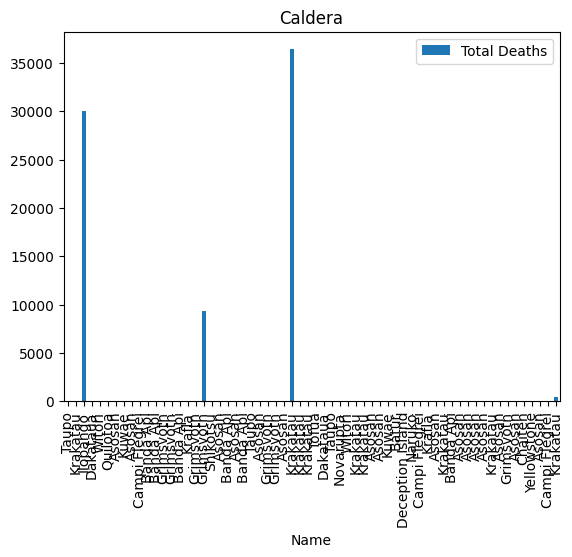

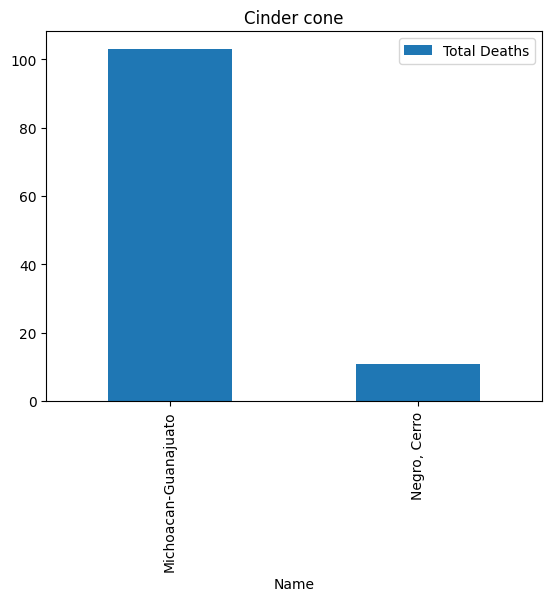

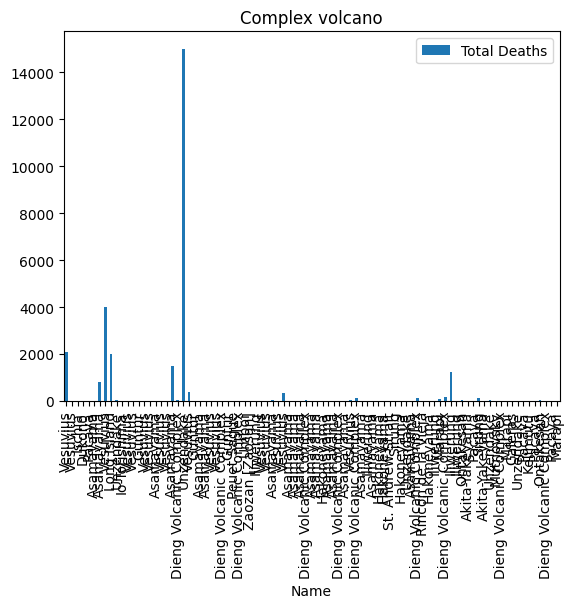

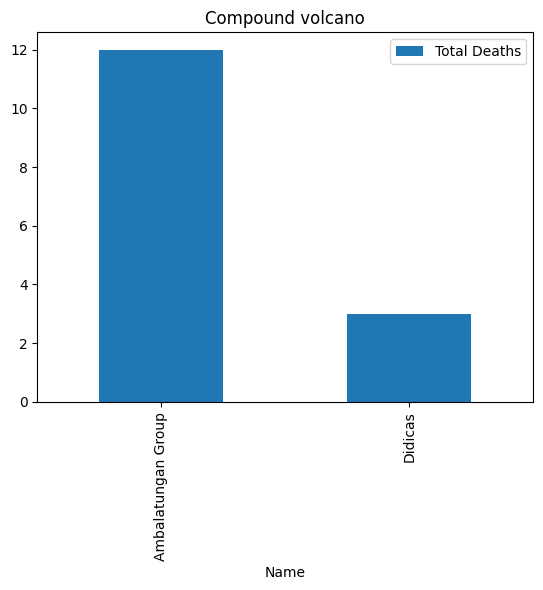

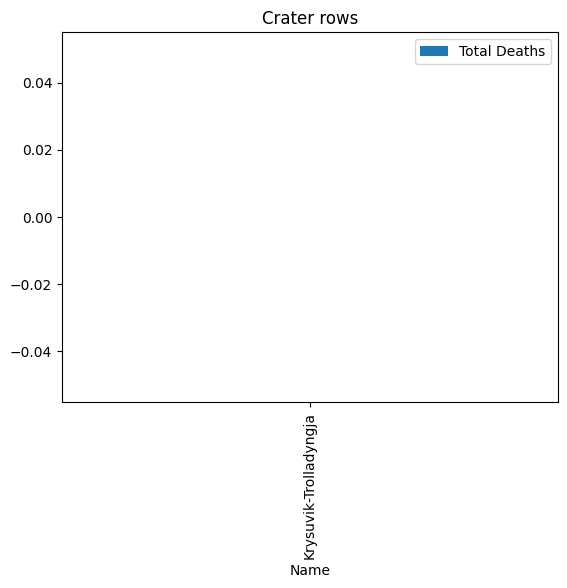

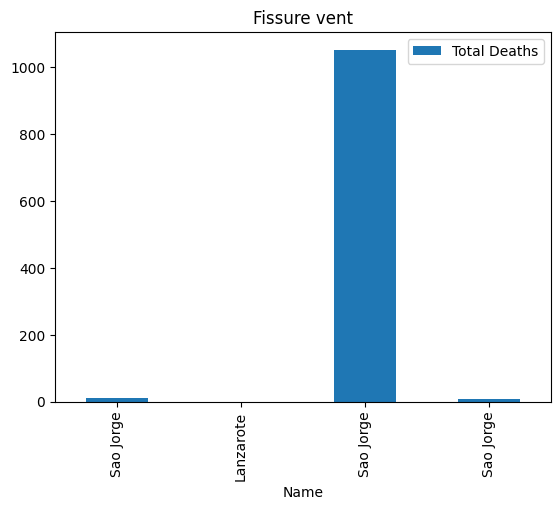

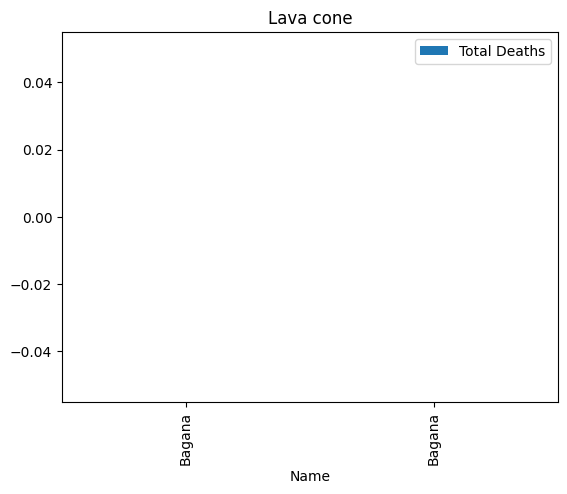

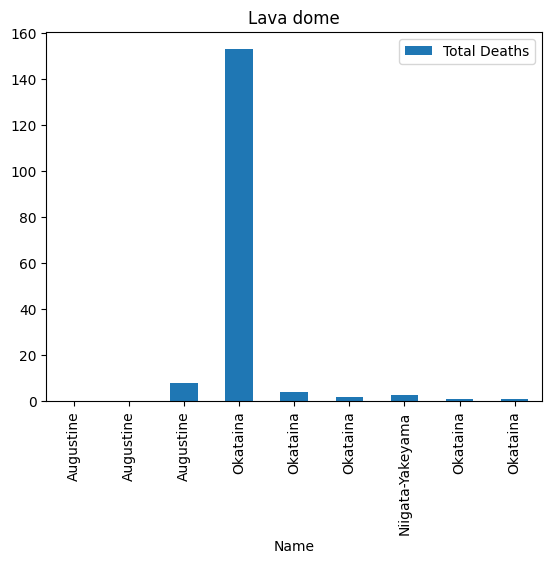

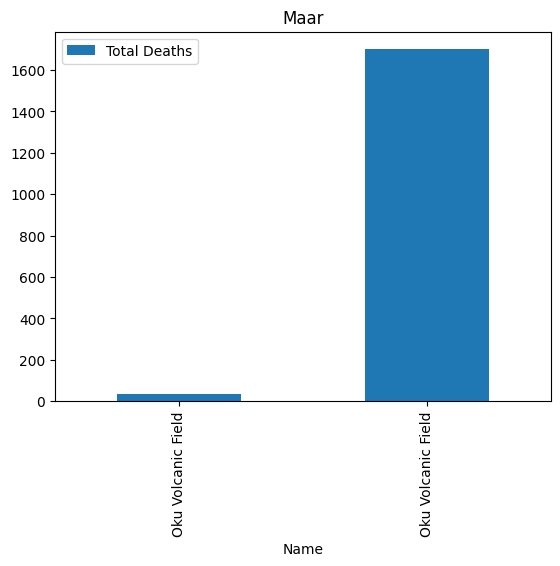

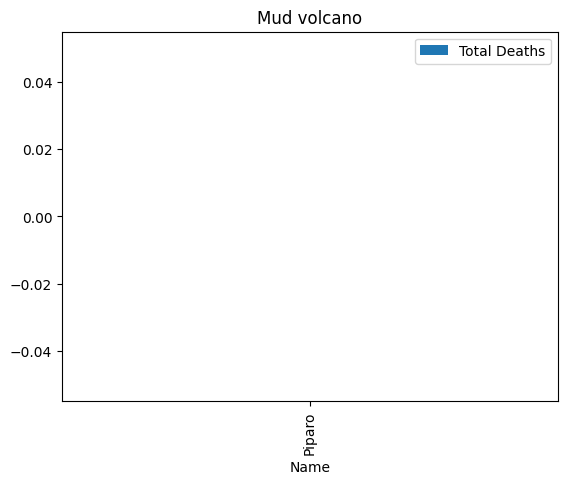

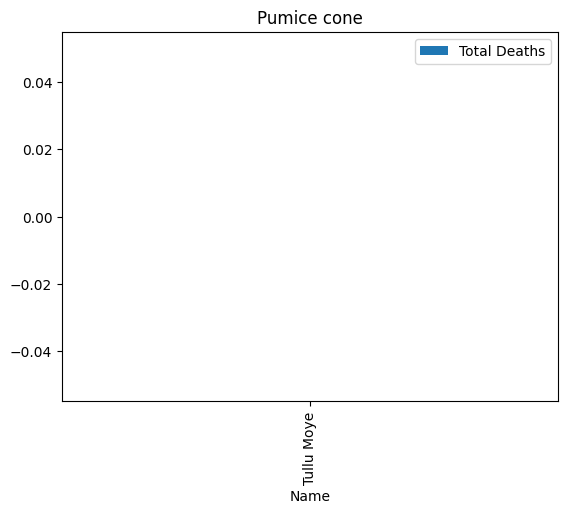

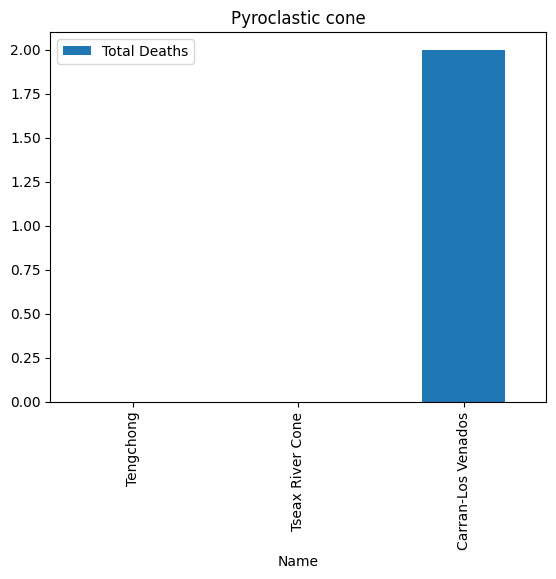

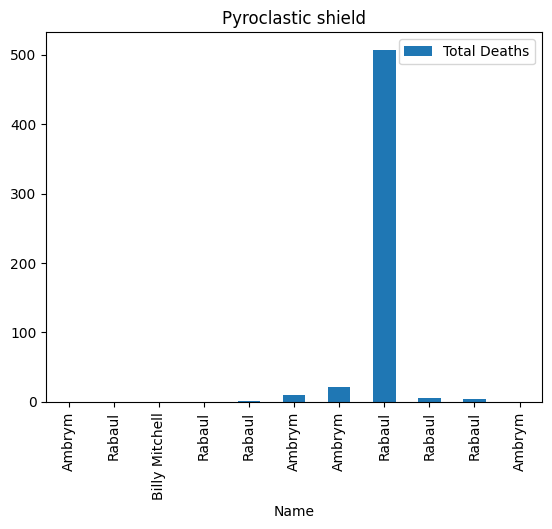

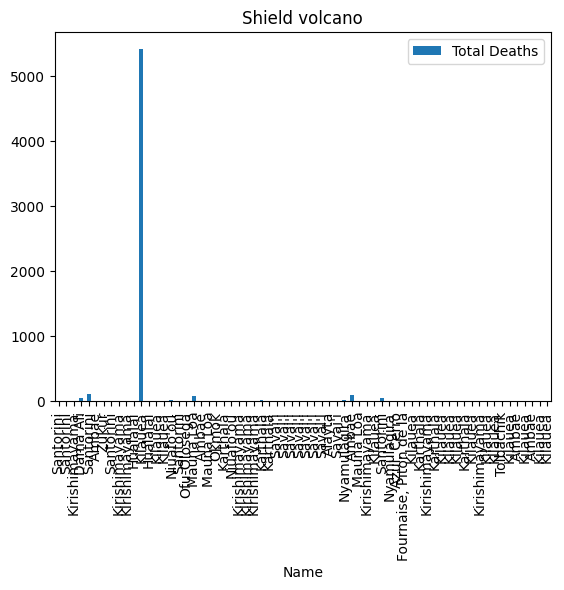

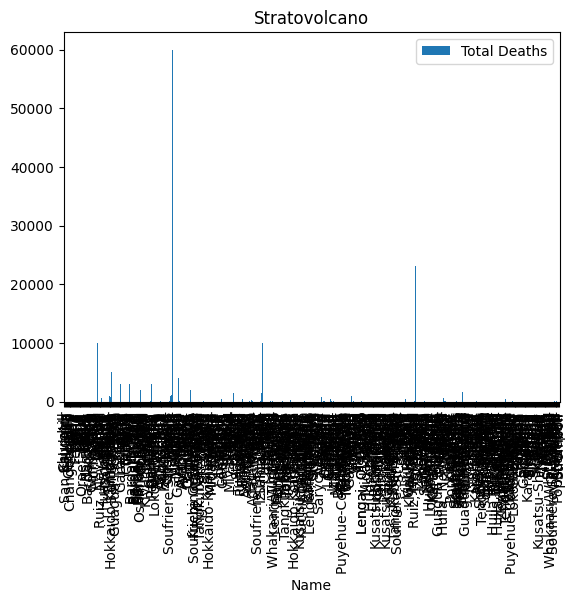

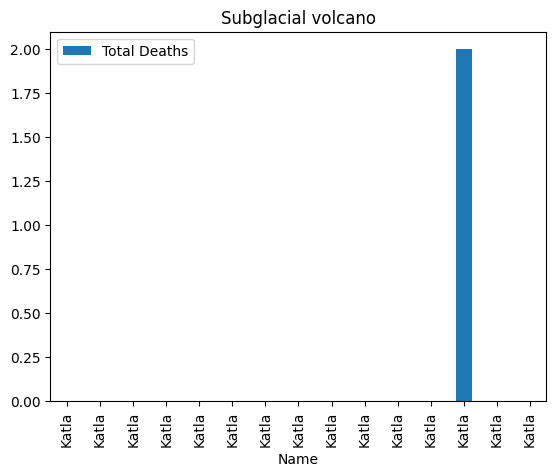

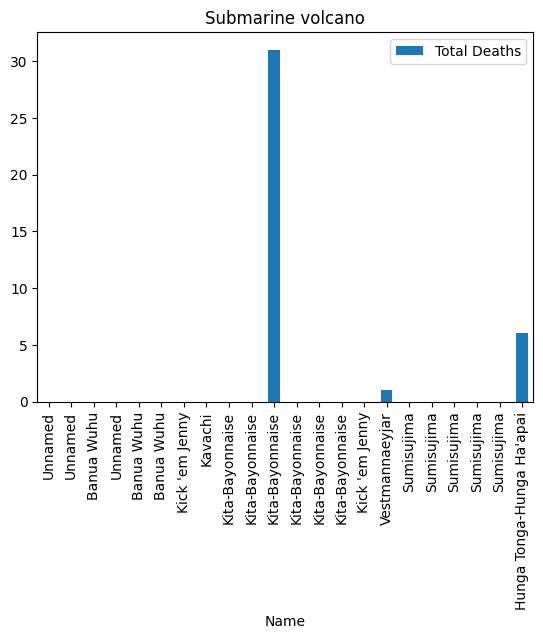

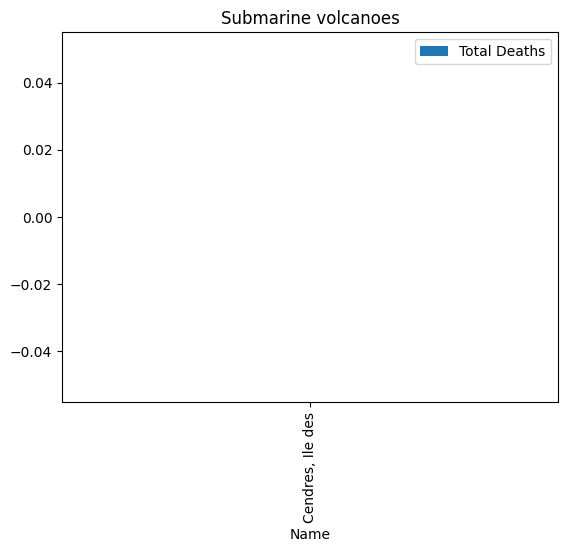

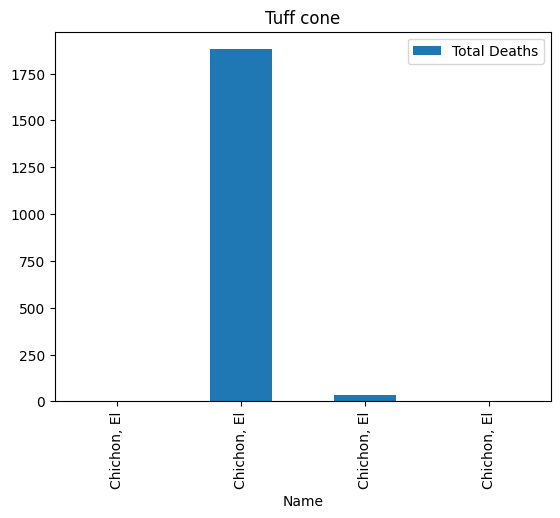

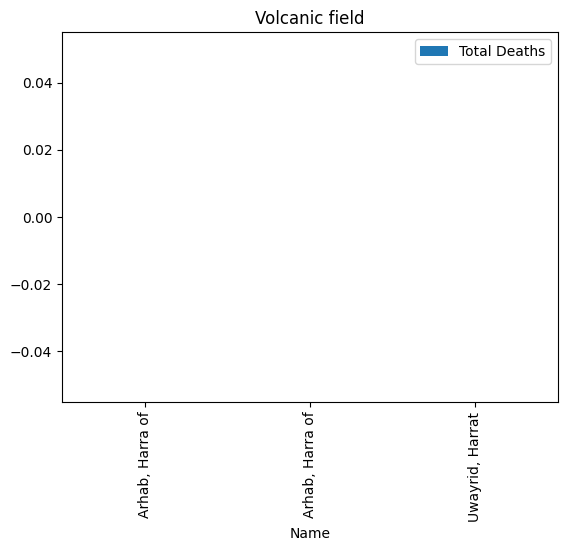

In [94]:
for key,frame in vol_data.groupby("Type"):
  vol_bar = frame.plot.bar(x="Name", y="Total Deaths", title=key)